[View in Colaboratory](https://colab.research.google.com/github/sungreong/TIL/blob/master/Konlpy_Text_Generation(keras).ipynb)

# 참고자료

##  http://shakeratos.tistory.com/18  
## http://project-marcel.tistory.com/9
## https://github.com/konlpy/konlpy/issues/24

## https://datascienceschool.net/view-notebook/26607ca8822341878e1cab7c9045007c/

In [17]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [3]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
os.chdir("drive/GPU")
!ls

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
annotations	    drive   images	    jpype-master  __pycache__
annotations.tar.gz  filter  images.tar.gz   model_save	  torch_gan
data		    graphs  imFunctions.py  output


In [2]:
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

Hit:1 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:2 http://ppa.launchpad.net/alessandro-strada/ppa/ubuntu artful InRelease
Get:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease [74.6 kB]
Get:5 http://security.ubuntu.com/ubuntu artful-security InRelease [83.2 kB]
Fetched 247 kB in 0s (282 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.2.0-1ubuntu1).
python-dev is already the newest version (2.7.14-2ubuntu1).
python3-dev is already the newest version (3.6.3-0ubuntu2).
openjdk-8-jdk is already the newest version (8u171-b11-0ubuntu0.17.10.1).
0 upgraded, 0 newly installed, 0 to remove and 3 not upgraded.


In [4]:
os.chdir("./jpype-master")
!ls

appveyor	      dist	       jpypex	    setup.py
appveyor.yml	      doc	       LICENSE	    test
AUTHORS.rst	      examples	       MANIFEST.in  test-requirements-py3.txt
build		      jpype	       native	    test-requirements.txt
dev-requirements.txt  JPype1.egg-info  README.rst


datalab  drive	jpype-master  master.zip


In [5]:
!python setup.py build

Found native jni.h at /usr/lib/jvm/java-8-openjdk-amd64/include
running build
running build_py
running build_ext
setup.py:175: FeatureNotice: Turned ON Numpy support for fast Java array access
  FeatureNotice)


In [0]:
!python setup.py install


In [1]:
import konlpy

from konlpy.tag import Kkma

from konlpy.utils import pprint

from konlpy.tag import Twitter



sentence = u'만 6세 이하의 초등학교 취학 전 자녀를 양육하기 위해서는'

words = konlpy.tag.Twitter().pos(sentence)

print(words)

[('만', 'Noun'), ('6', 'Number'), ('세', 'Noun'), ('이하', 'Noun'), ('의', 'Josa'), ('초등학교', 'Noun'), ('취학', 'Noun'), ('전', 'Noun'), ('자녀', 'Noun'), ('를', 'Josa'), ('양육', 'Noun'), ('하기', 'Verb'), ('위해서', 'Verb'), ('는', 'Eomi')]


In [0]:
!pip install -q keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.optimizers import *
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

from nltk.tokenize import sent_tokenize
from konlpy.corpus import kolaw
from konlpy.tag import Twitter
import numpy as np

In [0]:
c = kolaw.open('constitution.txt').read()

In [12]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
senstents = [s for s in sent_tokenize(c)]

In [14]:
senstents[3]

'제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.'

# Preprocessing

In [0]:
twitter= Twitter()
doc0 = [" ".join(["".join(w) for w, t in twitter.pos(s) 
                  if t not in ['Number', "Foreign"] and w not in ["제", "조"]]) for s in sent_tokenize(c)]

In [16]:
len(doc0)

357

In [17]:
doc0[3:5]

['대한민국 의 국민 이 되는 요건 은 법률 로 정한 다 .',
 '국가 는 법률 이 정하는 바 에 의하여 재외국민 을 보호할 의무 를 진 다 .']

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(doc0)
doc = [l for l in tokenizer.texts_to_sequences(doc0) if len(l) > 1 ]

In [19]:
len(doc)

354

In [21]:
doc[3]

[101, 1, 19, 6, 177, 653, 5, 9, 20, 37, 3]

In [23]:
maxlen = max([len(x) -1 for x in doc])
vocab_size = len(tokenizer.word_index) +1 
print(maxlen , vocab_size)

188 1205


## Data Generation

In [0]:
def generate_data(X , maxlen, vocab_size) :
    for sentence in X :
        inputs = []
        targets = []
        for i in range(1, len(sentence)) :
            inputs.append(sentence[0:i])
            targets.append(sentence[i])
        y= np_utils.to_categorical(targets , vocab_size)
        inputs_sequence = sequence.pad_sequences(inputs , maxlen = maxlen)
        yield (inputs_sequence , y )

In [26]:
for i , (x,y) in enumerate(generate_data(doc, maxlen, vocab_size )) :
    print("i", i)
    print("x", x.shape , "\n" , x)
    print('y', y.shape, "\n", y)
    print("==============================================")
    if i > 1 :
        break

i 0
x (188, 188) 
 [[  0   0   0 ...   0   0 101]
 [  0   0   0 ...   0 101  24]
 [  0   0   0 ... 101  24 607]
 ...
 [  0   0 101 ... 155   2  18]
 [  0 101  24 ...   2  18 176]
 [101  24 607 ...  18 176   7]]
y (188, 1205) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
i 1
x (5, 188) 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   

In [30]:
X= [] ; Y = []
for x, y in generate_data(doc, maxlen, vocab_size):
    X.append(x)
    Y.append(y)


print(np.shape(X))
X = np.concatenate(X)
print(np.shape(X))
print(np.shape(Y))
Y = np.concatenate(Y)
print(np.shape(Y))

(354,)
(6923, 188)
(354,)
(6923, 1205)


In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length= maxlen))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(vocab_size , activation="softmax"))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 188, 100)          120500    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1205)              121705    
Total params: 322,605
Trainable params: 322,605
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=["accuracy"])


In [42]:
%%time
hist = model.fit(X, Y, epochs=500, batch_size=800, verbose=2)

Epoch 1/500
 - 6s - loss: 6.7774 - acc: 0.0329
Epoch 2/500
 - 4s - loss: 5.8667 - acc: 0.0500
Epoch 3/500
 - 4s - loss: 5.7400 - acc: 0.0513
Epoch 4/500
 - 4s - loss: 5.7283 - acc: 0.0487
Epoch 5/500
 - 4s - loss: 5.7090 - acc: 0.0488
Epoch 6/500
 - 4s - loss: 5.6740 - acc: 0.0475
Epoch 7/500
 - 4s - loss: 5.6660 - acc: 0.0508
Epoch 8/500
 - 4s - loss: 5.6335 - acc: 0.0530
Epoch 9/500
 - 4s - loss: 5.6116 - acc: 0.0527
Epoch 10/500
 - 4s - loss: 5.5812 - acc: 0.0526
Epoch 11/500
 - 4s - loss: 5.5496 - acc: 0.0558
Epoch 12/500
 - 4s - loss: 5.5110 - acc: 0.0536
Epoch 13/500
 - 4s - loss: 5.4721 - acc: 0.0582
Epoch 14/500
 - 4s - loss: 5.4355 - acc: 0.0586
Epoch 15/500
 - 4s - loss: 5.3976 - acc: 0.0601
Epoch 16/500
 - 4s - loss: 5.3600 - acc: 0.0630
Epoch 17/500
 - 4s - loss: 5.3315 - acc: 0.0646
Epoch 18/500
 - 4s - loss: 5.2873 - acc: 0.0735
Epoch 19/500
 - 4s - loss: 5.2469 - acc: 0.0774
Epoch 20/500
 - 4s - loss: 5.2119 - acc: 0.0802
Epoch 21/500
 - 4s - loss: 5.1709 - acc: 0.0887
E

 - 4s - loss: 4.2726 - acc: 0.2079
Epoch 47/500
 - 4s - loss: 4.2393 - acc: 0.2158
Epoch 48/500
 - 4s - loss: 4.2113 - acc: 0.2171
Epoch 49/500
 - 4s - loss: 4.1741 - acc: 0.2246
Epoch 50/500
 - 4s - loss: 4.1401 - acc: 0.2268
Epoch 51/500
 - 4s - loss: 4.1153 - acc: 0.2340
Epoch 52/500
 - 4s - loss: 4.0856 - acc: 0.2366
Epoch 53/500
 - 4s - loss: 4.0539 - acc: 0.2425
Epoch 54/500
 - 4s - loss: 4.0243 - acc: 0.2456
Epoch 55/500
 - 4s - loss: 3.9948 - acc: 0.2479
Epoch 56/500
 - 4s - loss: 3.9666 - acc: 0.2470
Epoch 57/500
 - 4s - loss: 3.9369 - acc: 0.2567
Epoch 58/500
 - 4s - loss: 3.9073 - acc: 0.2593
Epoch 59/500
 - 4s - loss: 3.8868 - acc: 0.2575
Epoch 60/500
 - 4s - loss: 3.8641 - acc: 0.2632
Epoch 61/500
 - 4s - loss: 3.8352 - acc: 0.2691
Epoch 62/500
 - 4s - loss: 3.7999 - acc: 0.2721
Epoch 63/500
 - 4s - loss: 3.7768 - acc: 0.2752
Epoch 64/500
 - 4s - loss: 3.7471 - acc: 0.2791
Epoch 65/500
 - 4s - loss: 3.7277 - acc: 0.2785
Epoch 66/500
 - 4s - loss: 3.6939 - acc: 0.2887
Epoch

 - 4s - loss: 3.1192 - acc: 0.3572
Epoch 92/500
 - 4s - loss: 3.1081 - acc: 0.3611
Epoch 93/500
 - 4s - loss: 3.0823 - acc: 0.3660
Epoch 94/500
 - 4s - loss: 3.0618 - acc: 0.3705
Epoch 95/500
 - 4s - loss: 3.0563 - acc: 0.3689
Epoch 96/500
 - 4s - loss: 3.0276 - acc: 0.3740
Epoch 97/500
 - 4s - loss: 3.0120 - acc: 0.3735
Epoch 98/500
 - 4s - loss: 2.9890 - acc: 0.3734
Epoch 99/500
 - 4s - loss: 2.9589 - acc: 0.3800
Epoch 100/500
 - 4s - loss: 2.9458 - acc: 0.3777
Epoch 101/500
 - 4s - loss: 2.9311 - acc: 0.3861
Epoch 102/500
 - 4s - loss: 2.9193 - acc: 0.3873
Epoch 103/500
 - 4s - loss: 2.8865 - acc: 0.3958
Epoch 104/500
 - 4s - loss: 2.8841 - acc: 0.3920
Epoch 105/500
 - 4s - loss: 2.8495 - acc: 0.3977
Epoch 106/500
 - 4s - loss: 2.8436 - acc: 0.3978
Epoch 107/500
 - 4s - loss: 2.8257 - acc: 0.4004
Epoch 108/500
 - 4s - loss: 2.7976 - acc: 0.4008
Epoch 109/500
 - 4s - loss: 2.7932 - acc: 0.4065
Epoch 110/500
 - 4s - loss: 2.7645 - acc: 0.4159
Epoch 111/500
 - 4s - loss: 2.7610 - acc: 

Epoch 136/500
 - 4s - loss: 2.3636 - acc: 0.4758
Epoch 137/500
 - 4s - loss: 2.3621 - acc: 0.4783
Epoch 138/500
 - 4s - loss: 2.3544 - acc: 0.4787
Epoch 139/500
 - 4s - loss: 2.3427 - acc: 0.4866
Epoch 140/500
 - 4s - loss: 2.3228 - acc: 0.4855
Epoch 141/500
 - 4s - loss: 2.3251 - acc: 0.4837
Epoch 142/500
 - 4s - loss: 2.2926 - acc: 0.4881
Epoch 143/500
 - 4s - loss: 2.2759 - acc: 0.4934
Epoch 144/500
 - 4s - loss: 2.2660 - acc: 0.4943
Epoch 145/500
 - 4s - loss: 2.2606 - acc: 0.4940
Epoch 146/500
 - 4s - loss: 2.2367 - acc: 0.5017
Epoch 147/500
 - 4s - loss: 2.2164 - acc: 0.5066
Epoch 148/500
 - 4s - loss: 2.2091 - acc: 0.5108
Epoch 149/500
 - 4s - loss: 2.2100 - acc: 0.5050
Epoch 150/500
 - 4s - loss: 2.1894 - acc: 0.5103
Epoch 151/500
 - 4s - loss: 2.1646 - acc: 0.5141
Epoch 152/500
 - 4s - loss: 2.1486 - acc: 0.5215
Epoch 153/500
 - 4s - loss: 2.1544 - acc: 0.5137
Epoch 154/500
 - 4s - loss: 2.1359 - acc: 0.5243
Epoch 155/500
 - 4s - loss: 2.1190 - acc: 0.5252
Epoch 156/500
 - 4s 

Epoch 181/500
 - 4s - loss: 1.8437 - acc: 0.5821
Epoch 182/500
 - 4s - loss: 1.8316 - acc: 0.5820
Epoch 183/500
 - 4s - loss: 1.8212 - acc: 0.5860
Epoch 184/500
 - 4s - loss: 1.8113 - acc: 0.5902
Epoch 185/500
 - 4s - loss: 1.8035 - acc: 0.5898
Epoch 186/500
 - 4s - loss: 1.7967 - acc: 0.5865
Epoch 187/500
 - 4s - loss: 1.8008 - acc: 0.5908
Epoch 188/500
 - 4s - loss: 1.7800 - acc: 0.5938
Epoch 189/500
 - 4s - loss: 1.7787 - acc: 0.5996
Epoch 190/500
 - 4s - loss: 1.7654 - acc: 0.5963
Epoch 191/500
 - 4s - loss: 1.7464 - acc: 0.6008
Epoch 192/500
 - 4s - loss: 1.7532 - acc: 0.6000
Epoch 193/500
 - 4s - loss: 1.7298 - acc: 0.6165
Epoch 194/500
 - 4s - loss: 1.7306 - acc: 0.6026
Epoch 195/500
 - 4s - loss: 1.7258 - acc: 0.6097
Epoch 196/500
 - 4s - loss: 1.7151 - acc: 0.6047
Epoch 197/500
 - 4s - loss: 1.7026 - acc: 0.6114
Epoch 198/500
 - 4s - loss: 1.7163 - acc: 0.6099
Epoch 199/500
 - 4s - loss: 1.6736 - acc: 0.6226
Epoch 200/500
 - 4s - loss: 1.6607 - acc: 0.6210
Epoch 201/500
 - 4s 

Epoch 226/500
 - 4s - loss: 1.4620 - acc: 0.6633
Epoch 227/500
 - 4s - loss: 1.4756 - acc: 0.6608
Epoch 228/500
 - 4s - loss: 1.4641 - acc: 0.6610
Epoch 229/500
 - 4s - loss: 1.4594 - acc: 0.6611
Epoch 230/500
 - 4s - loss: 1.4486 - acc: 0.6692
Epoch 231/500
 - 4s - loss: 1.4493 - acc: 0.6633
Epoch 232/500
 - 4s - loss: 1.4271 - acc: 0.6708
Epoch 233/500
 - 4s - loss: 1.4404 - acc: 0.6720
Epoch 234/500
 - 4s - loss: 1.4325 - acc: 0.6734
Epoch 235/500
 - 4s - loss: 1.4108 - acc: 0.6790
Epoch 236/500
 - 4s - loss: 1.4193 - acc: 0.6753
Epoch 237/500
 - 4s - loss: 1.4069 - acc: 0.6798
Epoch 238/500
 - 4s - loss: 1.4032 - acc: 0.6785
Epoch 239/500
 - 4s - loss: 1.3951 - acc: 0.6760
Epoch 240/500
 - 4s - loss: 1.3861 - acc: 0.6814
Epoch 241/500
 - 4s - loss: 1.3728 - acc: 0.6857
Epoch 242/500
 - 4s - loss: 1.3761 - acc: 0.6815
Epoch 243/500
 - 4s - loss: 1.3685 - acc: 0.6868
Epoch 244/500
 - 4s - loss: 1.3721 - acc: 0.6900
Epoch 245/500
 - 4s - loss: 1.3679 - acc: 0.6816
Epoch 246/500
 - 4s 

Epoch 271/500
 - 4s - loss: 1.2072 - acc: 0.7146
Epoch 272/500
 - 4s - loss: 1.1928 - acc: 0.7253
Epoch 273/500
 - 4s - loss: 1.2102 - acc: 0.7150
Epoch 274/500
 - 4s - loss: 1.1967 - acc: 0.7178
Epoch 275/500
 - 4s - loss: 1.1962 - acc: 0.7182
Epoch 276/500
 - 4s - loss: 1.2019 - acc: 0.7150
Epoch 277/500
 - 4s - loss: 1.1909 - acc: 0.7191
Epoch 278/500
 - 4s - loss: 1.1847 - acc: 0.7274
Epoch 279/500
 - 4s - loss: 1.1785 - acc: 0.7235
Epoch 280/500
 - 4s - loss: 1.1750 - acc: 0.7227
Epoch 281/500
 - 4s - loss: 1.1752 - acc: 0.7280
Epoch 282/500
 - 4s - loss: 1.1565 - acc: 0.7306
Epoch 283/500
 - 4s - loss: 1.1540 - acc: 0.7302
Epoch 284/500
 - 4s - loss: 1.1536 - acc: 0.7280
Epoch 285/500
 - 4s - loss: 1.1494 - acc: 0.7247
Epoch 286/500
 - 4s - loss: 1.1418 - acc: 0.7339
Epoch 287/500
 - 4s - loss: 1.1432 - acc: 0.7344
Epoch 288/500
 - 4s - loss: 1.1546 - acc: 0.7299
Epoch 289/500
 - 4s - loss: 1.1305 - acc: 0.7386
Epoch 290/500
 - 4s - loss: 1.1234 - acc: 0.7386
Epoch 291/500
 - 4s 

Epoch 316/500
 - 4s - loss: 1.0085 - acc: 0.7621
Epoch 317/500
 - 4s - loss: 1.0251 - acc: 0.7533
Epoch 318/500
 - 4s - loss: 1.0235 - acc: 0.7544
Epoch 319/500
 - 4s - loss: 1.0285 - acc: 0.7505
Epoch 320/500
 - 4s - loss: 1.0157 - acc: 0.7579
Epoch 321/500
 - 4s - loss: 1.0005 - acc: 0.7651
Epoch 322/500
 - 4s - loss: 1.0037 - acc: 0.7591
Epoch 323/500
 - 4s - loss: 1.0037 - acc: 0.7602
Epoch 324/500
 - 4s - loss: 0.9888 - acc: 0.7679
Epoch 325/500
 - 4s - loss: 0.9917 - acc: 0.7672
Epoch 326/500
 - 4s - loss: 0.9880 - acc: 0.7622
Epoch 327/500
 - 4s - loss: 0.9993 - acc: 0.7680
Epoch 328/500
 - 4s - loss: 0.9860 - acc: 0.7676
Epoch 329/500
 - 4s - loss: 0.9942 - acc: 0.7641
Epoch 330/500
 - 4s - loss: 0.9765 - acc: 0.7700
Epoch 331/500
 - 4s - loss: 0.9819 - acc: 0.7663
Epoch 332/500
 - 4s - loss: 0.9580 - acc: 0.7745
Epoch 333/500
 - 4s - loss: 0.9747 - acc: 0.7656
Epoch 334/500
 - 4s - loss: 0.9602 - acc: 0.7686
Epoch 335/500
 - 4s - loss: 0.9555 - acc: 0.7765
Epoch 336/500
 - 4s 

Epoch 361/500
 - 4s - loss: 0.8969 - acc: 0.7846
Epoch 362/500
 - 4s - loss: 0.8607 - acc: 0.7932
Epoch 363/500
 - 4s - loss: 0.8759 - acc: 0.7891
Epoch 364/500
 - 4s - loss: 0.8672 - acc: 0.7904
Epoch 365/500
 - 4s - loss: 0.8764 - acc: 0.7862
Epoch 366/500
 - 4s - loss: 0.8722 - acc: 0.7900
Epoch 367/500
 - 4s - loss: 0.8783 - acc: 0.7855
Epoch 368/500
 - 4s - loss: 0.8600 - acc: 0.7919
Epoch 369/500
 - 4s - loss: 0.8634 - acc: 0.7864
Epoch 370/500
 - 4s - loss: 0.8529 - acc: 0.7950
Epoch 371/500
 - 4s - loss: 0.8553 - acc: 0.7975
Epoch 372/500
 - 4s - loss: 0.8493 - acc: 0.7913
Epoch 373/500
 - 4s - loss: 0.8498 - acc: 0.7966
Epoch 374/500
 - 4s - loss: 0.8394 - acc: 0.7978
Epoch 375/500
 - 4s - loss: 0.8474 - acc: 0.7981
Epoch 376/500
 - 4s - loss: 0.8576 - acc: 0.7946
Epoch 377/500
 - 4s - loss: 0.8442 - acc: 0.7958
Epoch 378/500
 - 4s - loss: 0.8395 - acc: 0.7976
Epoch 379/500
 - 4s - loss: 0.8378 - acc: 0.7956
Epoch 380/500
 - 4s - loss: 0.8281 - acc: 0.7966
Epoch 381/500
 - 4s 

Epoch 406/500
 - 4s - loss: 0.7758 - acc: 0.8103
Epoch 407/500
 - 4s - loss: 0.7653 - acc: 0.8144
Epoch 408/500
 - 4s - loss: 0.7688 - acc: 0.8128
Epoch 409/500
 - 4s - loss: 0.7713 - acc: 0.8108
Epoch 410/500
 - 4s - loss: 0.7658 - acc: 0.8096
Epoch 411/500
 - 4s - loss: 0.7632 - acc: 0.8148
Epoch 412/500
 - 4s - loss: 0.7519 - acc: 0.8189
Epoch 413/500
 - 4s - loss: 0.7671 - acc: 0.8155
Epoch 414/500
 - 4s - loss: 0.7618 - acc: 0.8109
Epoch 415/500
 - 4s - loss: 0.7590 - acc: 0.8160
Epoch 416/500
 - 4s - loss: 0.7561 - acc: 0.8137
Epoch 417/500
 - 4s - loss: 0.7625 - acc: 0.8158
Epoch 418/500
 - 4s - loss: 0.7524 - acc: 0.8168
Epoch 419/500
 - 4s - loss: 0.7505 - acc: 0.8158
Epoch 420/500
 - 4s - loss: 0.7418 - acc: 0.8239
Epoch 421/500
 - 4s - loss: 0.7435 - acc: 0.8225
Epoch 422/500
 - 4s - loss: 0.7536 - acc: 0.8115
Epoch 423/500
 - 4s - loss: 0.7429 - acc: 0.8207
Epoch 424/500
 - 4s - loss: 0.7330 - acc: 0.8216
Epoch 425/500
 - 4s - loss: 0.7334 - acc: 0.8249
Epoch 426/500
 - 4s 

Epoch 451/500
 - 4s - loss: 0.6989 - acc: 0.8187
Epoch 452/500
 - 4s - loss: 0.6889 - acc: 0.8262
Epoch 453/500
 - 4s - loss: 0.6880 - acc: 0.8317
Epoch 454/500
 - 4s - loss: 0.6817 - acc: 0.8306
Epoch 455/500
 - 4s - loss: 0.6890 - acc: 0.8281
Epoch 456/500
 - 4s - loss: 0.6917 - acc: 0.8255
Epoch 457/500
 - 4s - loss: 0.6798 - acc: 0.8284
Epoch 458/500
 - 4s - loss: 0.6865 - acc: 0.8300
Epoch 459/500
 - 4s - loss: 0.6918 - acc: 0.8272
Epoch 460/500
 - 4s - loss: 0.6770 - acc: 0.8353
Epoch 461/500
 - 4s - loss: 0.6752 - acc: 0.8320
Epoch 462/500
 - 4s - loss: 0.6681 - acc: 0.8314
Epoch 463/500
 - 4s - loss: 0.6766 - acc: 0.8319
Epoch 464/500
 - 4s - loss: 0.6703 - acc: 0.8358
Epoch 465/500
 - 4s - loss: 0.6623 - acc: 0.8349
Epoch 466/500
 - 4s - loss: 0.6753 - acc: 0.8342
Epoch 467/500
 - 4s - loss: 0.6594 - acc: 0.8355
Epoch 468/500
 - 4s - loss: 0.6787 - acc: 0.8323
Epoch 469/500
 - 4s - loss: 0.6693 - acc: 0.8330
Epoch 470/500
 - 4s - loss: 0.6524 - acc: 0.8382
Epoch 471/500
 - 4s 

Epoch 496/500
 - 4s - loss: 0.6238 - acc: 0.8439
Epoch 497/500
 - 4s - loss: 0.6117 - acc: 0.8483
Epoch 498/500
 - 4s - loss: 0.6261 - acc: 0.8436
Epoch 499/500
 - 4s - loss: 0.6088 - acc: 0.8470
Epoch 500/500
 - 4s - loss: 0.6120 - acc: 0.8465
CPU times: user 37min 30s, sys: 8min 6s, total: 45min 36s
Wall time: 34min 28s


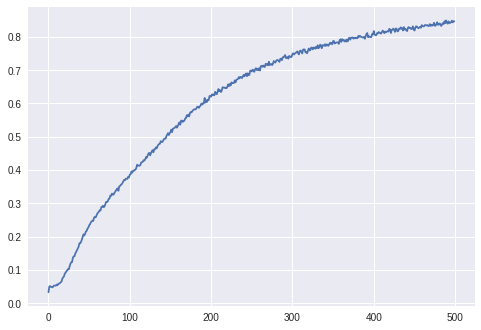

In [44]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.show()

In [49]:
import os
os.chdir("./content")
!ls

datalab  drive	jpype-master  master.zip  nltk_data


In [50]:
os.chdir("./drive/GPU/model_save")
!ls

model1.h5    model2.h5	model.json  raw.githubusercontent.com
model1.json  model.h5	model.yaml


In [51]:
model_json = model.to_json()
with open("rnn_text.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("rnn_text2.h5")
print("Saved model to drive")
model.save("rnn_text_gen.hdf5")

Saved model to drive


In [0]:
from keras.models import load_model
model = load_model("rnn_text_gen.hdf5")

In [70]:
word_list = '대한민국 의 국민 이 되는 요건 은 법률 로 정한 다 .'.split(" ")
word_list
print(word_list[:1])
print(word_list[:2])
print(word_list[:3])
[tokenizer.word_index[w] for w in word_list[:2]]

['대한민국']
['대한민국', '의']
['대한민국', '의', '국민']


[101, 1]

In [0]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))


In [61]:
print(type(reverse_word_map))
len(reverse_word_map)

<class 'dict'>


1204

In [66]:
print(tokenizer.word_index)

{'의': 1, '에': 2, '다': 3, '을': 4, '은': 5, '이': 6, '한': 7, '를': 8, '법률': 9, '는': 10, '수': 11, '대통령': 12, '과': 13, '할': 14, '국가': 15, '또는': 16, '국회': 17, '의하여': 18, '국민': 19, '로': 20, '아니': 21, '있다': 22, '때': 23, '헌법': 24, '으로': 25, '정하는': 26, '그': 27, '야': 28, '에는': 29, '가': 30, '와': 31, '된': 32, '관한': 33, '모든': 34, '바': 35, '적': 36, '정한': 37, '하여': 38, '나': 39, '하며': 40, '가진': 41, '기타': 42, '위하여': 43, '및': 44, '인': 45, '장': 46, '사항': 47, '되': 48, '에서': 49, '권리': 50, '안': 51, '필요한': 52, '지': 53, '없다': 54, '의원': 55, '경제': 56, '정부': 57, '선거': 58, '임명': 59, '자유': 60, '하': 61, '직무': 62, '국무총리': 63, '의무': 64, '조직': 65, '국회의원': 66, '임기': 67, '의결': 68, '공무원': 69, '정당': 70, '경우': 71, '이상': 72, '국무위원': 73, '대법원': 74, '며': 75, '범위': 76, '있어': 77, '일': 78, '이를': 79, '받지': 80, '자': 81, '법관': 82, '관하여': 83, '정책': 84, '헌법재판소': 85, '재적': 86, '회의': 87, '항의': 88, '얻어': 89, '진': 90, '하고': 91, '년': 92, '될': 93, '하고는': 94, '법원': 95, '집회': 96, '중': 97, '과반수': 98, '찬성': 99, '자문': 100, '대한민국': 101, '대한': 102, 

In [71]:
x = sequence.pad_sequences([[tokenizer.word_index[w] for w in word_list[:2]]], maxlen=maxlen)
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [72]:
print(len(model.predict(x)))
p = model.predict(x)[0]
len(p)

1


1205

In [74]:
idx = np.flip(np.argsort(p), 0)
print(len(idx))
idx

1205


array([ 438,  437,   19, ...,  436,   89, 1011])

In [75]:
p[idx]

array([3.3499768e-01, 2.4437273e-01, 7.4007072e-02, ..., 3.8910351e-11,
       6.9717717e-12, 6.2162051e-12], dtype=float32)

In [76]:
for i in idx[:5]:
    print(reverse_word_map[i])

영토
주권
국민
은
종류


In [0]:
def predict_word(i, n=1):
    x = sequence.pad_sequences([[tokenizer.word_index[w] for w in word_list[:i]]], maxlen=maxlen)
    p = model.predict(x)[0]
    idx = np.flip(np.argsort(p), 0)
    for j in idx[:n]:
        print('"', " ".join(word_list[:i]), '"', reverse_word_map[j], " (p={:4.2f}%)".format(100 * p[j]))

In [78]:
predict_word(1, n=3)

" 대한민국 " 의  (p=53.93%)
" 대한민국 " 은  (p=39.62%)
" 대한민국 " 는  (p=1.71%)


In [79]:
predict_word(2, n=3)

" 대한민국 의 " 영토  (p=33.50%)
" 대한민국 의 " 주권  (p=24.44%)
" 대한민국 의 " 국민  (p=7.40%)


In [80]:
predict_word(3, n=3)

" 대한민국 의 국민 " 이  (p=52.06%)
" 대한민국 의 국민 " 은  (p=29.65%)
" 대한민국 의 국민 " 의  (p=5.25%)


In [81]:
predict_word(4, n=3)

" 대한민국 의 국민 이 " 되는  (p=91.97%)
" 대한민국 의 국민 이 " 아닌  (p=1.32%)
" 대한민국 의 국민 이 " 고문  (p=1.13%)


In [82]:
predict_word(5, n=3)

" 대한민국 의 국민 이 되는 " 요건  (p=99.07%)
" 대한민국 의 국민 이 되는 " 되는  (p=0.06%)
" 대한민국 의 국민 이 되는 " 만료  (p=0.05%)


In [83]:
predict_word(6, n=3)

" 대한민국 의 국민 이 되는 요건 " 은  (p=99.40%)
" 대한민국 의 국민 이 되는 요건 " 과  (p=0.14%)
" 대한민국 의 국민 이 되는 요건 " 의  (p=0.12%)


In [84]:
predict_word(7, n=3)

" 대한민국 의 국민 이 되는 요건 은 " 법률  (p=99.16%)
" 대한민국 의 국민 이 되는 요건 은 " 대통령  (p=0.18%)
" 대한민국 의 국민 이 되는 요건 은 " 국회  (p=0.18%)


In [85]:
predict_word(8, n=3)

" 대한민국 의 국민 이 되는 요건 은 법률 " 로  (p=97.69%)
" 대한민국 의 국민 이 되는 요건 은 법률 " 이  (p=1.93%)
" 대한민국 의 국민 이 되는 요건 은 법률 " 에  (p=0.17%)


In [86]:
predict_word(9, n=3)

" 대한민국 의 국민 이 되는 요건 은 법률 로 " 정한  (p=99.74%)
" 대한민국 의 국민 이 되는 요건 은 법률 로 " 정하는  (p=0.12%)
" 대한민국 의 국민 이 되는 요건 은 법률 로 " 정하되  (p=0.04%)


In [87]:
predict_word(10, n=3)

" 대한민국 의 국민 이 되는 요건 은 법률 로 정한 " 다  (p=99.91%)
" 대한민국 의 국민 이 되는 요건 은 법률 로 정한 " 후  (p=0.02%)
" 대한민국 의 국민 이 되는 요건 은 법률 로 정한 " 로  (p=0.01%)


In [0]:
def generate(w, n, seed=None):
    
    if seed is not None:
        np.random.seed(seed)
    
    def _predict_word(sent):
        x = sequence.pad_sequences([[tokenizer.word_index[w] for w in sent]], maxlen=maxlen)
        p = model.predict(x)[0]
        logp = np.log(p)
        p = np.exp(logp) / np.sum(np.exp(logp))
        p = p[1:]
        return np.random.choice(list(tokenizer.word_index.keys()), p=p)

    sent = [w]
    for i in range(n):
        w = _predict_word(sent)
        sent.append(w)
        
    return " ".join(sent)

In [127]:
generate("대한민국", 10, seed=1)

'대한민국 의 영토 의 수립 에 국민 이 이를 중대한 상'

In [128]:
generate("대한민국", 10, seed=2)

'대한민국 의 은 헌법 과 이 헌법 에 의한 법률 에'

In [129]:
generate("대한민국", 10, seed=3)

'대한민국 은 국제 평화 의 유지 에 노력하고 침략 적 전쟁'

In [130]:
generate("국민", 10, seed=1)

'국민 은 비상계엄 의 행사 에 필요한 적 으로 하며 국가'

In [131]:
generate("국민", 10, seed=3)

'국민 은 소추 의 의무 를 침해 한 다 한 다'

In [132]:
generate("세계", 10, seed=3)

'세계 행위 가 아닌 까지 국무위원 인 그 임기 는 년'